In [129]:
import warnings
import learn as learn

warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

df = pd.read_csv('data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:
df.isnull().sum().sum()

0

In [131]:
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
target = df['Species']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop('Species', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.067797,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667


In [132]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(df_scaled)
embedding.shape

(150, 2)

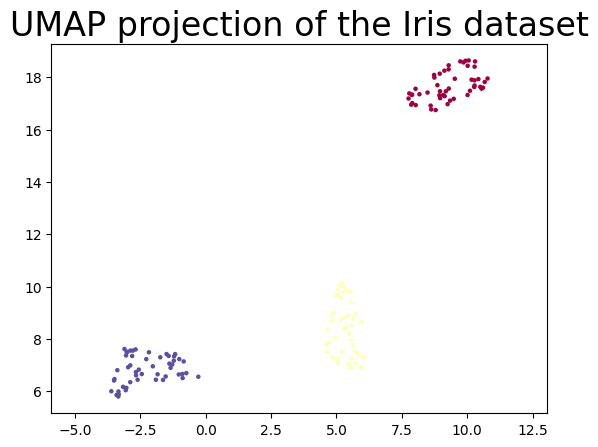

In [133]:
import matplotlib.pyplot as plt
plt.scatter(embedding[:, 0], embedding[:, 1], c=df['Species'], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

In [134]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [135]:
from sklearn.cluster import KMeans

silhouettes = []
adjusted_rand_scores = []

for k in list(range(2, 11)):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_scaled)
    labels = kmeans.labels_
    silhouettes.append(silhouette_score(df_scaled, labels))
    adjusted_rand_scores.append(adjusted_rand_score(target, labels))




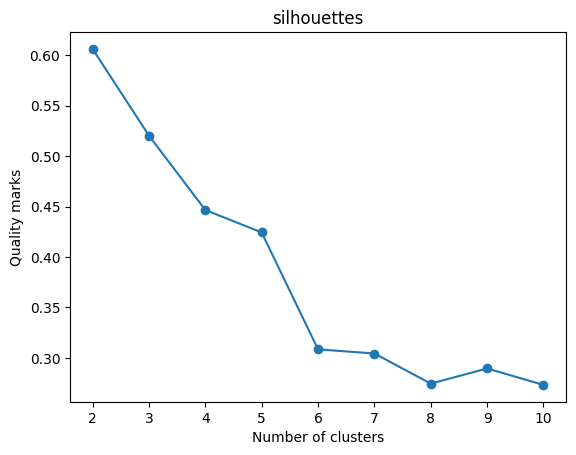

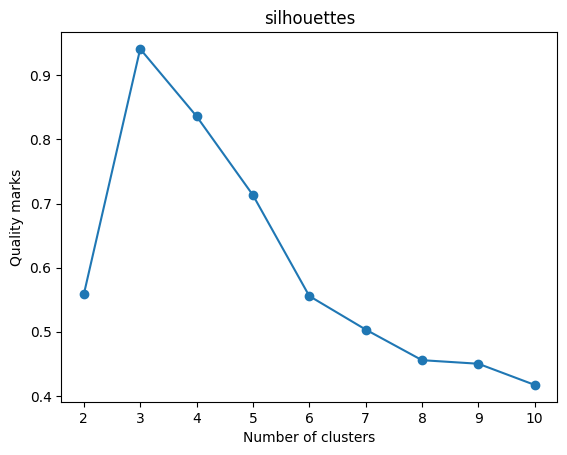

In [136]:
plt.plot(list(range(2, 11)), silhouettes, marker='o')
plt.title('silhouettes')
plt.xlabel('Number of clusters')
plt.ylabel('Quality marks')
plt.show()

plt.plot(list(range(2, 11)), adjusted_rand_scores, marker='o')
plt.title('silhouettes')
plt.xlabel('Number of clusters')
plt.ylabel('Quality marks')
plt.show()

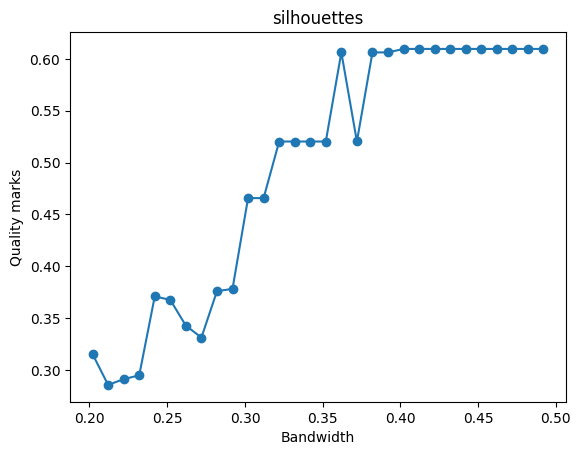

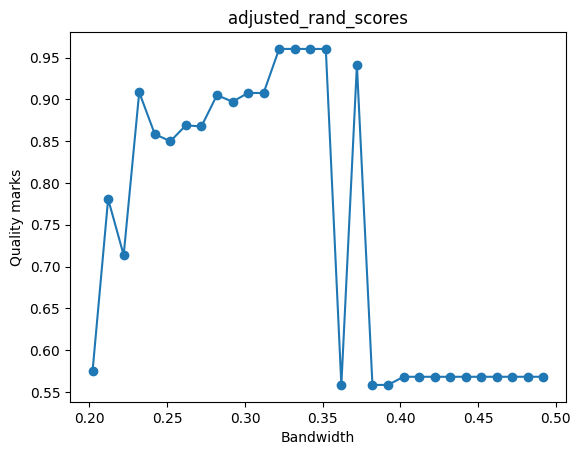

In [137]:
from sklearn.cluster import MeanShift

silhouettes = []
adjusted_rand_scores = []

samples = list(np.arange(0.202, 0.5, 0.01))
for bandwith in samples:
    meanshift = MeanShift(bandwidth=bandwith).fit(df_scaled)
    labels = meanshift.labels_
    adjusted_rand_scores.append(adjusted_rand_score(target, labels))
    silhouettes.append(silhouette_score(df_scaled, labels))

plt.plot(samples, silhouettes, marker='o')
plt.title('silhouettes')
plt.xlabel('Bandwidth')
plt.ylabel('Quality marks')
plt.show()

plt.plot(samples, adjusted_rand_scores, marker='o')
plt.title('adjusted_rand_scores')
plt.xlabel('Bandwidth')
plt.ylabel('Quality marks')
plt.show()


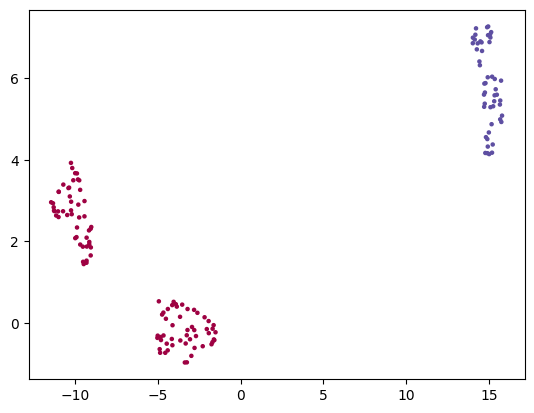

In [139]:
meanshift = MeanShift(bandwidth=0.4).fit(df_scaled)
labels = meanshift.labels_

embedding = reducer.fit_transform(df_scaled)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', s=5)